# Reconhecimento de Padrões (TIP8311) - Trabalho 2


**Professor:** Guilherme de Alencar Barreto  

<img src="https://loop.frontiersin.org/images/profile/243428/203" alt="Foto do Professor" width="150"/>


**Aluno:** Luis Felipe Carneiro de Souza    **Matrícula:** 593034

**Objetivos**:

(1) Estimar a matriz de covariância de um conjunto de dados usando diferentes algoritmos, comparando de modo sistemático e científico o tempo de execução dos algoritmos de estimação.

(2) Avaliar a priori  a   invertibilidade   da   matriz   de   covariância   estimada.   

(3) Inverter   e   regularizar   matrizes   de covariância.

In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

In [4]:
path_sensor_4 = "wall+following+robot+navigation+data\sensor_readings_4.data"

path_sensor_24 = "wall+following+robot+navigation+data\sensor_readings_24.data"

Método 1

In [5]:
def cov_1(X):
    p, N = X.shape
    soma = np.zeros((p, p))
    m = X.mean(axis=1).reshape(-1,1) # Vetor coluna
    for i in range(N):
        aux = X[:, i].reshape(-1, 1) - m
        soma += aux @ aux.T
    C = soma / N
    return C

Método 2

In [6]:
def cov_2(X):
    p, N = X.shape
    m = X.mean(axis=1).reshape(-1,1) # Vetor coluna
    aux = X - m
    return (aux @ aux.T) / N

Método 3

In [7]:
def cov_3(X):
    p, N = X.shape
    R = np.zeros((p, p))
    m = X.mean(axis=1).reshape(-1,1)
    for i in range(N):
        R += X[:, i].reshape(-1, 1) @ X[:, i].reshape(-1, 1).T

    C = (R / N) - (m @ m.T)
    return C

Método 4

In [8]:
def cov_4(X):
    p, N = X.shape
    m = X.mean(axis=1).reshape(-1,1)
    R = (X @ X.T) / N
    C = R - (m @ m.T)
    return C

Método de referência para o calculo da matriz de covariância

In [9]:
def cov_ref(X):
    return np.cov(X, bias=True)

## Q1.

Estimar a matriz de covariância GLOBAL (i.e. sem considerar os rótulos das classes) para o referido conjunto de dados usando os Métodos 1 a 4 descritos nos slides. Comparar como o resultado produzido pelo comando COV nativo Octave/Matlab ou de outra de programação de sua preferência. Para a comparação, calcular a norma da matriz de diferenças $E = C_{my} - C_{ref}$ em que $C_{my}$ é matriz de covariância estimada pelos métodos implementados $C_{ref}$ é a matriz de covariância de referência estimada pela função nativa da lingaugem de programação escolhida.

**Atenção!** Em geral, as funções nativas de diferentes linguagens de programação dividem por $(N-1)$ na estimação da matriz de covariância. Usem alguma *flag* para permitir a divisão por $N$

In [10]:
data_4 = np.genfromtxt(fname=path_sensor_4,
                       delimiter=",",
                       dtype=str,
                       encoding="utf-8")
data_24 = np.genfromtxt(fname=path_sensor_24,
                         delimiter=",",
                         dtype=str,
                         encoding="utf-8")

X_4 = data_4[:, :-1].astype(float)
y_4 = data_4[:, -1].reshape(-1,  1)

X_24 = data_24[:, :-1].astype(float)
y_24 = data_24[:, -1].reshape(-1, 1)

Para dado sensor 4

In [11]:
C_ref_4 = cov_ref(X_4)
C1_4, C2_4, C3_4, C4_4 = cov_1(X_4), cov_2(X_4), cov_3(X_4), cov_4(X_4)

In [12]:
E1_4 = C1_4 - C_ref_4
E2_4 = C2_4 - C_ref_4
E3_4 = C3_4 - C_ref_4
E4_4 = C4_4 - C_ref_4


print(f"Norma E (cov_1): {np.linalg.norm(E1_4):.4e}")
print(f"Norma E (cov_2): {np.linalg.norm(E2_4):.4e}")
print(f"Norma E (cov_3): {np.linalg.norm(E3_4):.4e}")
print(f"Norma E (cov_4): {np.linalg.norm(E4_4):.4e}")


Norma E (cov_1): 1.3513e-13
Norma E (cov_2): 0.0000e+00
Norma E (cov_3): 1.2742e-12
Norma E (cov_4): 1.2129e-12


Para dado sendor 24

In [13]:
C_ref_24 = cov_ref(X_24)
C1_24, C2_24, C3_24, C4_24 = cov_1(X_24), cov_2(X_24), cov_3(X_24), cov_4(X_24)

In [14]:
E1_24 = C1_24 - C_ref_24
E2_24 = C2_24 - C_ref_24
E3_24 = C3_24 - C_ref_24
E4_24 = C4_24 - C_ref_24


print(f"Norma E (cov_1): {np.linalg.norm(E1_24):.4e}")
print(f"Norma E (cov_2): {np.linalg.norm(E2_24):.4e}")
print(f"Norma E (cov_3): {np.linalg.norm(E3_24):.4e}")
print(f"Norma E (cov_4): {np.linalg.norm(E4_24):.4e}")


Norma E (cov_1): 7.0817e-13
Norma E (cov_2): 4.5137e-13
Norma E (cov_3): 5.4931e-12
Norma E (cov_4): 5.4710e-12


## Questão 02

Comparar (de modo cientficamente correto!) os métodos implementados no Item 1 com o comando COV nativo do Octave/Matlab ou de outra linguagem de programação que melhor lhe convier em termos de tempo médio de execução. No Matlab/Octave usar os comandos tic/toc. Para isso, execute cada método por 100 rodadas, guardando o tempo de execução de cada método em cada rodada. Ao final das 100 rodadas, compare os gráficos do histograma e do violin plot do tempo de execução de cada método. Compare-os também numericamente em termos de tempo de execução médio e desvio-padrão. Comente os resultados obtidos.

Para dados sensor 4

In [22]:
def calc_tempos(X):
    times = {'cov_1': [],
            'cov_2': [],
            'cov_3': [],
            'cov_4': []}

    for _ in tqdm(range(50)):
        t0 = time.time(); cov_1(X_4); times['cov_1'].append(time.time() - t0)
        t0 = time.time(); cov_2(X_4); times['cov_2'].append(time.time() - t0)
        t0 = time.time(); cov_3(X_4); times['cov_3'].append(time.time() - t0)
        t0 = time.time(); cov_4(X_4); times['cov_4'].append(time.time() - t0)

    for metodo, tempos in times.items():
        print(f"{metodo}: Média = {np.mean(tempos):.6f} s | Desvio-Padrão = {np.std(tempos):.6f} s")

    return times

In [24]:
def plot_violin_hist(times):
    fig, axes = plt.subplots(2,2, figsize=(8, 5))

    axes = axes.flatten()  # transformar em lista para iterar

    for i, (c, valores) in enumerate(times.items()):
        axes[i].violinplot(valores, showmeans=True, showmedians=True)
        axes[i].set_title(f"Método = {c}")
        axes[i].set_ylabel("Tempo de cálculo (s)")
        axes[i].grid(True, linestyle="--", alpha=0.6)

    plt.suptitle("Distribuição dos tempos de cálculo da matriz de covariância", fontsize=14)
    plt.tight_layout()
    plt.show()


In [23]:
times_4 = calc_tempos(X_4)

100%|██████████| 50/50 [01:28<00:00,  1.78s/it]

cov_1: Média = 0.529280 s | Desvio-Padrão = 0.036488 s
cov_2: Média = 0.215425 s | Desvio-Padrão = 0.011596 s
cov_3: Média = 0.656786 s | Desvio-Padrão = 0.024094 s
cov_4: Média = 0.377018 s | Desvio-Padrão = 0.025194 s


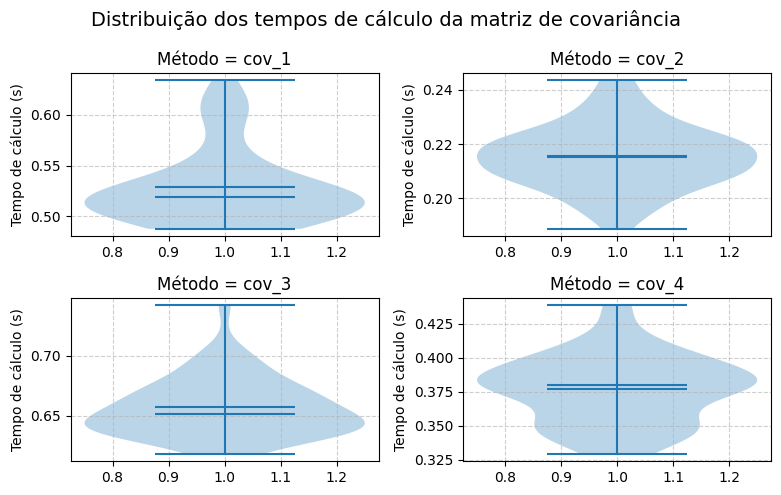

In [25]:
plot_violin_hist(times_4)

Para dados sensor 24

In [26]:
times_24 = calc_tempos(X_24)

100%|██████████| 50/50 [01:28<00:00,  1.77s/it]

cov_1: Média = 0.517916 s | Desvio-Padrão = 0.029451 s
cov_2: Média = 0.212671 s | Desvio-Padrão = 0.013016 s
cov_3: Média = 0.657708 s | Desvio-Padrão = 0.033084 s
cov_4: Média = 0.379819 s | Desvio-Padrão = 0.025190 s


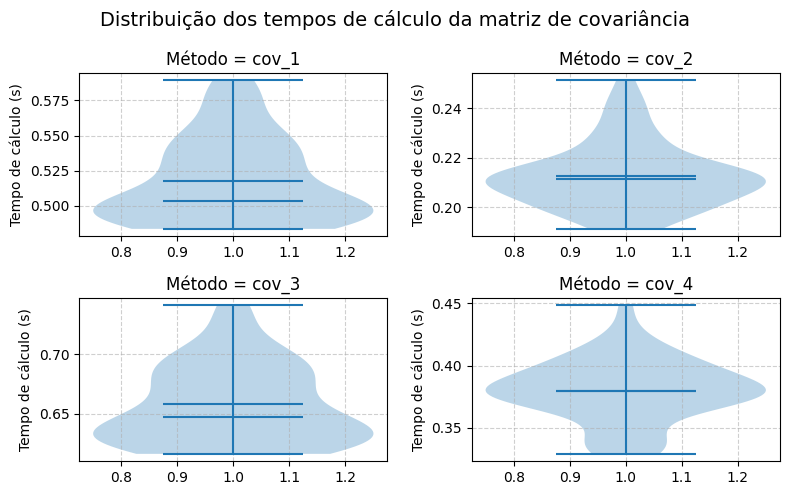

In [27]:
plot_violin_hist(times_24)

## Questão 03

Escolher o método mais rápido no Item 1 e estimar as matrizes de covariância de cada classe, avaliando suas invertibilidades comparando com a invertibilidade da matriz de covariância global através do posto e do número de condicionamento. No Matlab/Octave usar comandos rank e rcond. As matrizes em questão são invertíveis e numericamente bem-condicionadas?

In [22]:
X[:10, :]

array([[1.687, 0.445, 2.332, 0.429],
       [1.687, 0.449, 2.332, 0.429],
       [1.687, 0.449, 2.334, 0.429],
       [1.687, 0.449, 2.334, 0.429],
       [1.687, 0.449, 2.334, 0.429],
       [1.686, 0.446, 2.334, 0.43 ],
       [1.684, 0.451, 2.33 , 0.432],
       [1.68 , 0.453, 2.327, 0.436],
       [0.753, 0.457, 2.323, 0.442],
       [0.744, 0.462, 2.321, 0.449]])

In [ ]:
np.unique(y, return_counts=True)


for i in np.unique(y):
    mask = np.where(y == i)[0] # mascara dos indices
    # print((np.where(y == i))[0])
    # print(X[(np.where(y == i))[0], :])

    y_class = y[mask]
    X_class = X[mask, :]
    print(f"Classe: {i}, Matriz de covariância:")
    print(cov_4(X_class.T), '\n') 

Classe: Move-Forward, Matriz de covariância:
[[ 0.4677022  -0.00162651 -0.0646883  -0.11122701]
 [-0.00162651  0.00897263 -0.00546328  0.00755037]
 [-0.0646883  -0.00546328  0.28296953  0.04786369]
 [-0.11122701  0.00755037  0.04786369  0.34130193]] 

Classe: Sharp-Right-Turn, Matriz de covariância:
[[ 5.39462607e-03  4.23760936e-04 -6.83570516e-03 -4.25721561e-03]
 [ 4.23760936e-04  1.09053004e-01 -4.92398242e-02  8.22374161e-02]
 [-6.83570516e-03 -4.92398242e-02  4.48505192e-01 -5.39085397e-02]
 [-4.25721561e-03  8.22374161e-02 -5.39085397e-02  1.12071643e+00]] 

Classe: Slight-Left-Turn, Matriz de covariância:
[[ 0.10489945 -0.00764646  0.06755705 -0.0885949 ]
 [-0.00764646  0.27480251 -0.02828925  0.03960111]
 [ 0.06755705 -0.02828925  0.09801354 -0.06412424]
 [-0.0885949   0.03960111 -0.06412424  0.20613506]] 

Classe: Slight-Right-Turn, Matriz de covariância:
[[ 0.2812897  -0.00223476 -0.03581292 -0.00799291]
 [-0.00223476  0.00160667 -0.00519406  0.00123762]
 [-0.03581292 -0.005

## Questão 04

Inverter as matrizes de covariância global e de cada classe individualmente. OBS: Se houver problema de inversão destas matrizes, use alguma técnica de regularização discutidas em sala de  aula.